### EDA Airbnb Listing

- Perform EDA on Airbnb listings data for a specific city.
- Analyze factors: price, availability, location, propertytype.
- Identify trends in Airbnb demand.
- Clean and process data.
- Visualize data.
- Use Python and Jupyter Notebook.
- Include statistical analysis.

#### Dataset
- Bangkok, Central Thailand, Thailand (26 June, 2023) [Link to Dataset](http://insideairbnb.com/get-the-data/)


In [231]:
# Install Dependencies
! pip install matplotlib seaborn geopandas mplcursors folium

In [232]:
# Import Libraries
import folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [233]:
# Import your csv file
listing = pd.read_csv("/content/listings.csv")

# Explor your data
listing.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [234]:
# Countinue Exploring
listing.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27934,Condo in Samsen Nai · ★4.85 · 1 bedroom · 1 be...,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,1937,3,65,2020-01-06,0.48,2,269,0,NaN
1,27979,Rental unit in Bangkok · 1 bedroom · 2 beds · ...,120541,Emy,NaN,Bang Na,13.66818,100.61674,Private room,1338,1,0,NaN,NaN,2,0,0,NaN
2,28745,Rental unit in Bangkok · 1 bedroom · 1 bed · 1...,123784,Familyroom,NaN,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,0,0,NaN


#### After Exploring Drop any Columns you don't need

In [235]:
# price, availability, location, and property type

columns_to_drop = [
    'id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
    'minimum_nights', 'number_of_reviews', 'last_review',
    'reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm', 'license'
]

listing.drop(columns=columns_to_drop, inplace=True)


In [236]:
listing.head(3)

,neighbourhood,latitude,longitude,room_type,price,availability_365
0,Ratchathewi,13.75983,100.54134,Entire home/apt,1937,269
1,Bang Na,13.66818,100.61674,Private room,1338,0
2,Bang Kapi,13.75232,100.62402,Private room,800,0


In [237]:
# Combine latitude and longitude into a single location column
# You can skip this step
listing['location'] = listing['latitude'].astype(str) + ',' + listing['longitude'].astype(str)

listing.head(3)

,neighbourhood,latitude,longitude,room_type,price,availability_365,location
0,Ratchathewi,13.75983,100.54134,Entire home/apt,1937,269,"13.75983,100.54134"
1,Bang Na,13.66818,100.61674,Private room,1338,0,"13.66818,100.61674"
2,Bang Kapi,13.75232,100.62402,Private room,800,0,"13.75232,100.62402"


#### Putting your Output in a file make your work neet and easy to explore

In [238]:
# Create a PDF file to save the figures
pdf_filename = 'all_figures.pdf'
pdf_pages = PdfPages(pdf_filename)

#### Using neighbourhoods.geojson dataset to show frequancy of Neighborhood and Location that Customers tend to have reservation in

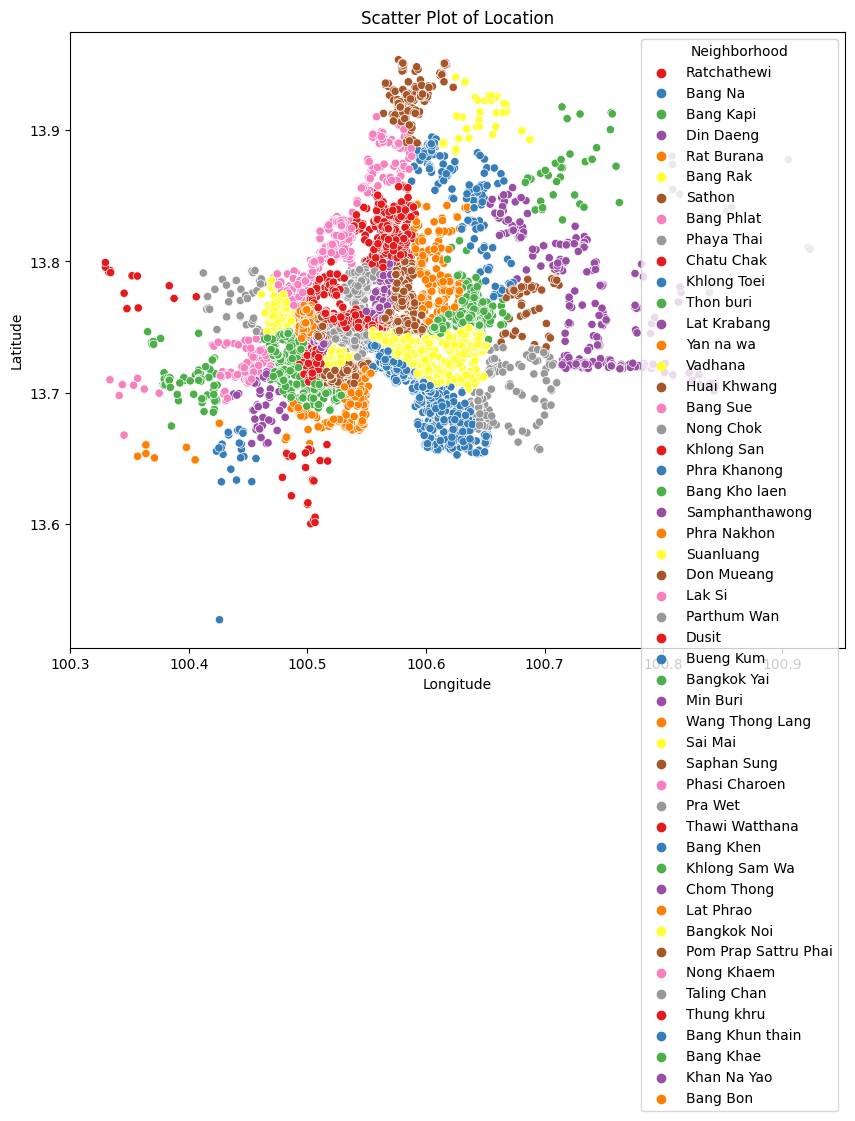

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import mplcursors

neighborhoods = gpd.read_file('/content/sample_data/neighbourhoods.geojson')

# Create a scatter plot using Seaborn
fig1 = plt.figure(figsize=(10, 8))  # Increase the figsize to make the figure larger
scatter = sns.scatterplot(data=listing, x='longitude', y='latitude', hue='neighbourhood', palette='Set1')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Location')

# Create a legend for the neighborhoods
plt.legend(title='Neighborhood', loc='upper right')

# Convert the scatter plot's data to a format mplcursors can work with
cursor = mplcursors.cursor(scatter, hover=True)

# Define a function to show neighborhood information
def on_hover(sel):
    x, y, _ = sel.target
    point = gpd.GeoDataFrame({'geometry': [gpd.points_from_xy([x], [y])]}, crs=neighborhoods.crs)
    neighborhood = gpd.sjoin(point, neighborhoods, how='left', op='within')
    if not neighborhood.empty:
        sel.annotation.set_text("Neighborhood: " + neighborhood['neighborhood_name'].values[0])
    else:
        sel.annotation.set_text("")

cursor.connect("add", on_hover)

# Show the plot
plt.show()

pdf_pages.savefig(fig1, bbox_inches='tight')



#### Seeing Room Type Distribution can make company fouce on the higher room type or fouce on increasing the hotel rooms or shared rooms

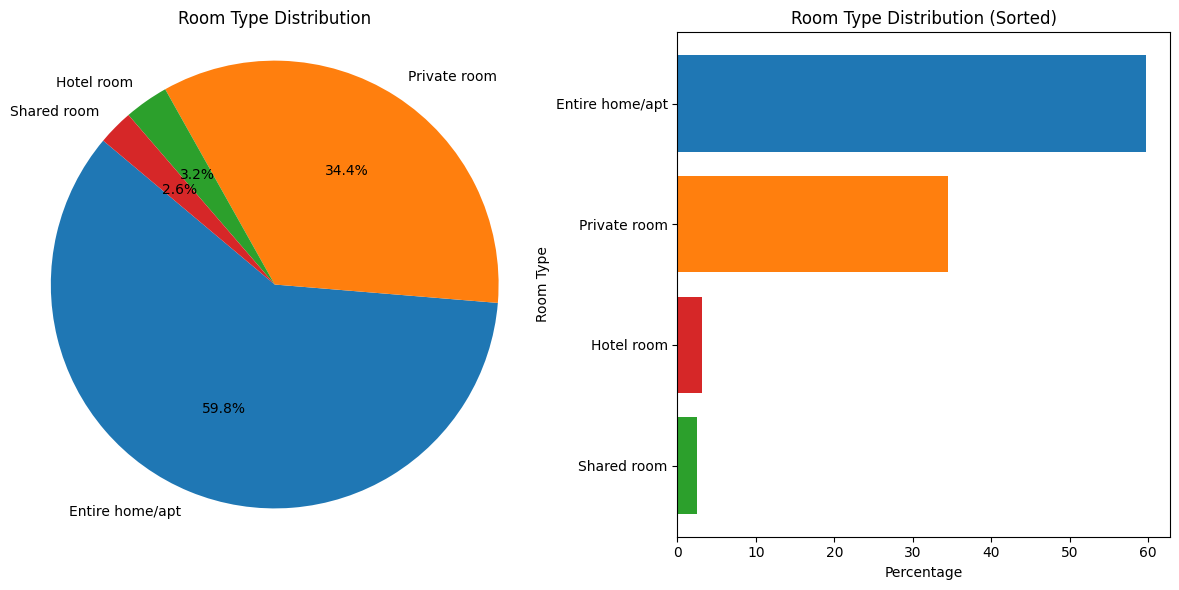

In [240]:
# Group the data by room_type and calculate the counts
room_type_counts = listing['room_type'].value_counts()

# Calculate the percentage distribution
total_rooms = room_type_counts.sum()
room_type_percentages = (room_type_counts / total_rooms) * 100

# Sort the room types and percentages
sorted_indices = room_type_percentages.sort_values(ascending=True).index
sorted_percentages = room_type_percentages[sorted_indices]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the pie chart on the first subplot
ax1.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Room Type Distribution')

# Define custom colors (darker shades)
custom_colors = ['#2ca02c','#d62728', '#ff7f0e','#1f77b4' ]

# Plot the horizontal bar plot on the second subplot
bars = ax2.barh(sorted_indices, sorted_percentages, color=custom_colors)
ax2.set_xlabel('Percentage')
ax2.set_ylabel('Room Type')
ax2.set_title('Room Type Distribution (Sorted)')

# Adjust layout for better spacing
plt.tight_layout()

# Display both plots
plt.show()

pdf_pages.savefig(fig, bbox_inches='tight')



#### Let's see these room types with each neighbourhood

<Figure size 2000x1500 with 0 Axes>

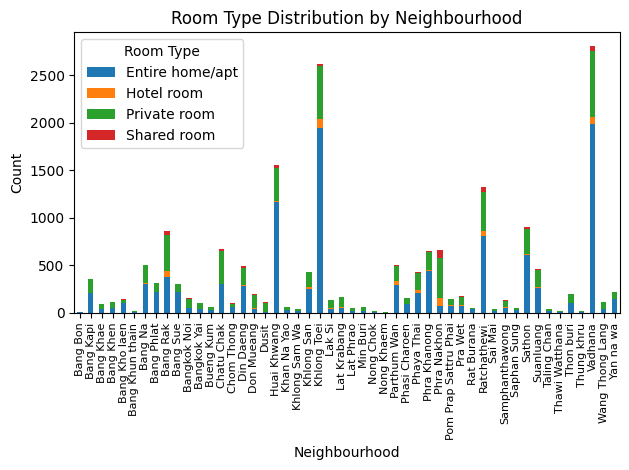

In [241]:
# Group the data by neighbourhood and room_type, then count the occurrences
grouped = listing.groupby(['neighbourhood', 'room_type']).size().unstack()

# Plot the bar plot
fig3 = plt.figure(figsize=(20, 15))

ax = grouped.plot(kind='bar', stacked=True)
plt.title('Room Type Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')

# Customize x-axis tick labels font size
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=90)

plt.legend(title='Room Type')
plt.tight_layout()

# Show the plot
plt.show()

pdf_pages.savefig(fig3, bbox_inches='tight')



#### Corr for Price and Avilability during the year

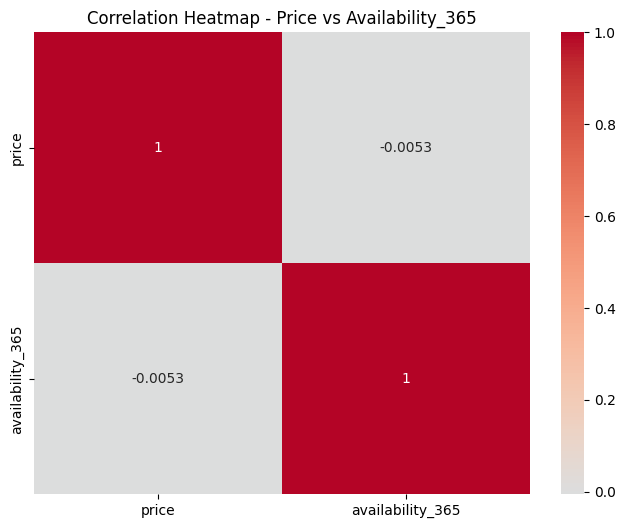

In [242]:
# Subset the DataFrame to include only 'price' and 'availability_365'
subset = listing[['price', 'availability_365']]

# Calculate the correlation matrix for the subset
correlation_matrix = subset.corr()

# Plot a heatmap of the correlation matrix
fig4 = plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Price vs Availability_365')
plt.show()

pdf_pages.savefig(fig4, bbox_inches='tight')


#### You can see the variation of each Type Price

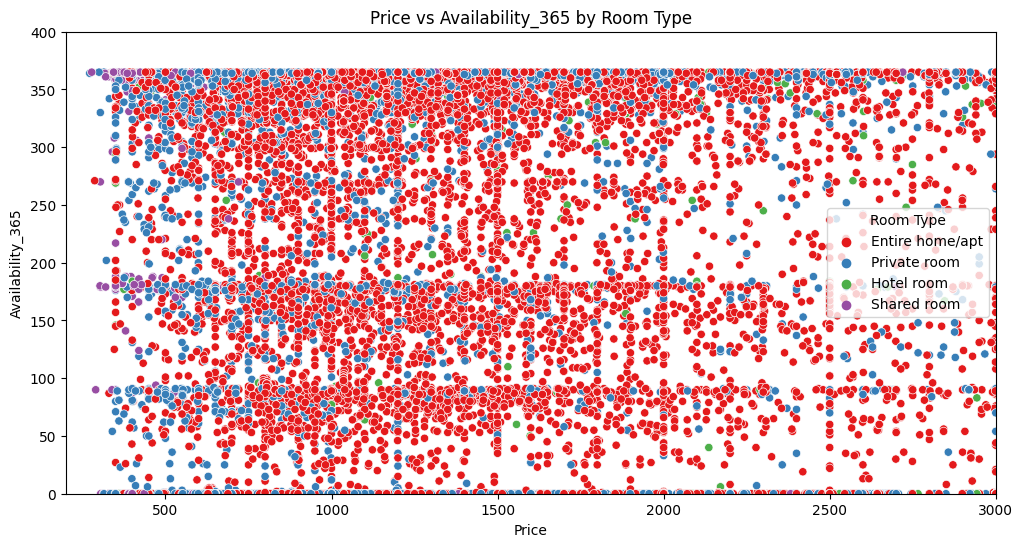

In [243]:
# Create a scatter plot of price vs availability_365
fig5 = plt.figure(figsize=(12, 6))
sns.scatterplot(listing, x='price', y='availability_365', hue='room_type', palette='Set1')
plt.title('Price vs Availability_365 by Room Type')
plt.xlabel('Price')
plt.ylabel('Availability_365')

# Set custom limits for x and y axes
plt.xlim(200, 3000)  # Adjust the values according to your data
plt.ylim(0, 400)  # Adjust the values according to your data

plt.legend(title='Room Type')
plt.show()

pdf_pages.savefig(fig5, bbox_inches='tight')


#### Let's see Neighbourhood vs Mean Price

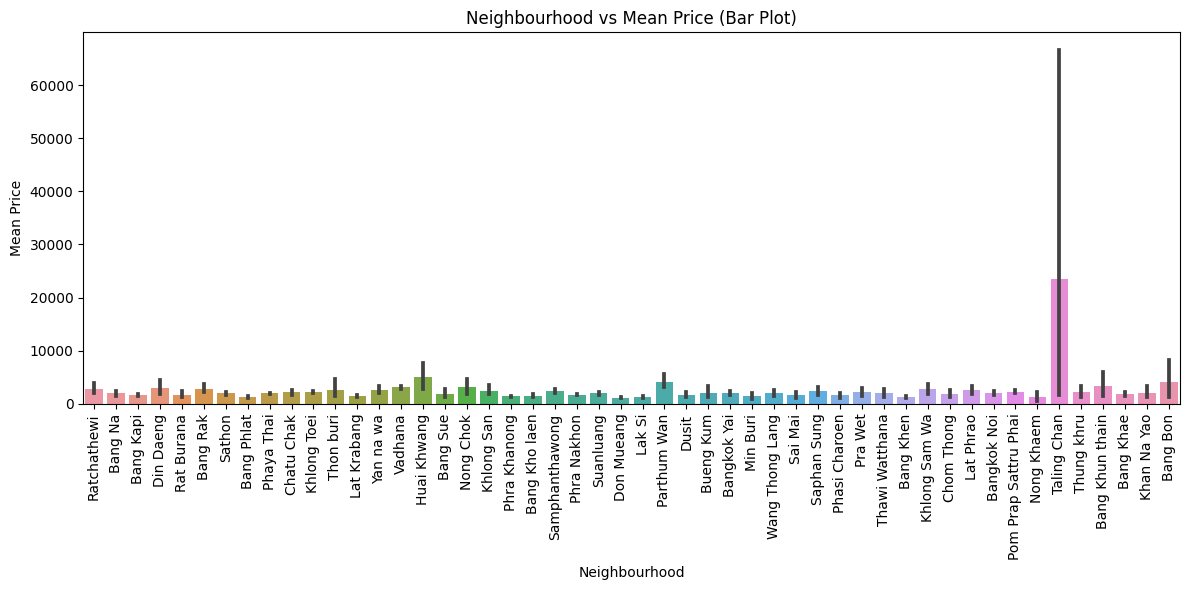

In [244]:
# Create a bar plot of neighbourhood vs mean price
fig6 = plt.figure(figsize=(12, 6))
sns.barplot(data=listing, x='neighbourhood', y='price', estimator=np.mean)
plt.title('Neighbourhood vs Mean Price (Bar Plot)')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

pdf_pages.savefig(fig6, bbox_inches='tight')


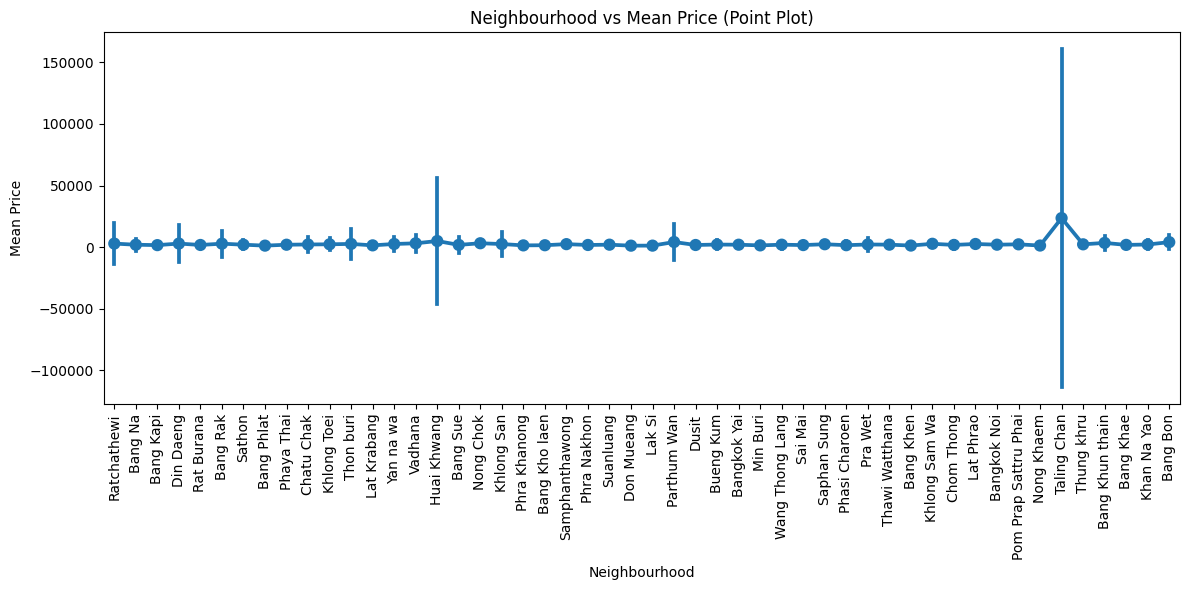

In [245]:
# Create a point plot of neighbourhood vs mean price
fig7 = plt.figure(figsize=(12, 6))
sns.pointplot(data=listing, x='neighbourhood', y='price', errorbar='sd', estimator=np.mean)
plt.title('Neighbourhood vs Mean Price (Point Plot)')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

pdf_pages.savefig(fig7, bbox_inches='tight')


In [246]:
# Close the PDF file
pdf_pages.close()